# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
import numpy as np, pandas as pd, statsmodels.api as sm, matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv("Bank-data.csv")
raw_data = raw_data.drop(["Unnamed: 0"],axis=1)
raw_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
data = raw_data.copy()
data["y"] = data["y"].map({"no":0,"yes":1})

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
x1 = data["duration"]
y = data["y"]

### Simple Logistic Regression

Run the regression.

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


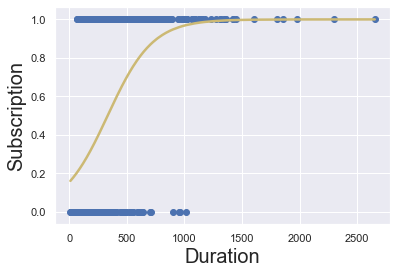

In [10]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results.params[0],results.params[1]))
x_sorted = np.sort(np.array(x1))

# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.plot(x_sorted,f_sorted,lw=2.5,c="C8")
plt.show()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.2121
Time:                        18:33:31   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

### Find the odds of duration

In [9]:
np.exp(0.0051)

1.005113027136717